Figure 2 of [Compound lensing: Einstein Zig-Zags and high multiplicity lensed images](http://adsabs.harvard.edu/abs/2016MNRAS.456.2210C)

In [1]:
# This example is very similar to the first notebook in this series.

%matplotlib inline
import grale.plotutil as plotutil
import grale.lenses as lenses
import grale.feedback as feedback
import grale.images as images
import grale.cosmology as cosmology
from grale.constants import *
from grale.multiplane import MultiImagePlane
import numpy as np
import matplotlib.pyplot as plt
import sys
import json

V = lambda x,y: np.array([x,y], dtype=np.double)
LI = plotutil.LensInfo

cosm = cosmology.Cosmology(0.7, 0.3, 0, 0.7)
Z = cosm.getAngularDiameterDistance
cosmology.setDefaultCosmology(cosm)

feedback.setDefaultFeedback("notebook")

In [2]:
# Settings to reproduce the alpha2 = 0.2, beta = 0.9 of fig 2

zd, zd2, zs = 0.1, 0.9, 10

sis = lenses.SISLens(Z(zd), { "velocityDispersion": 190000 })
sis2 = lenses.SISLens(Z(zd2), { "velocityDispersion": 100000 })

beta = (Z(zd, zd2)*Z(zs))/(Z(zd2)*Z(zd, zs))
print("beta", beta)

alpha1 = sis.getAlphaVector([1.0, 0.0])[0]*Z(zd, zs)/Z(zs)
alpha2 = sis2.getAlphaVector([1.0, 0.0])[0]*Z(zd2, zs)/Z(zs)
print("alpha2 (units of alpha1)", alpha2/alpha1)

U = alpha1
plotutil.setDefaultAngularUnit(U)

lens1 = sis
lens2 = lenses.CompositeLens(Z(zd2), [{"lens": sis2, "x": 0.1*U, "y": 0, "angle": 0, "factor": 1}])

beta 0.902978165197307
alpha2 (units of alpha1) 0.19610567364974454


In [3]:
tr = V(1.5,1.5)*U
bl = V(-1.5,-1.5)*U

lensInfo = LI([ (lens1, zd), (lens2, zd2) ], bottomleft=bl, topright=tr, zs=zs, numxy=1023)

Text(value='')

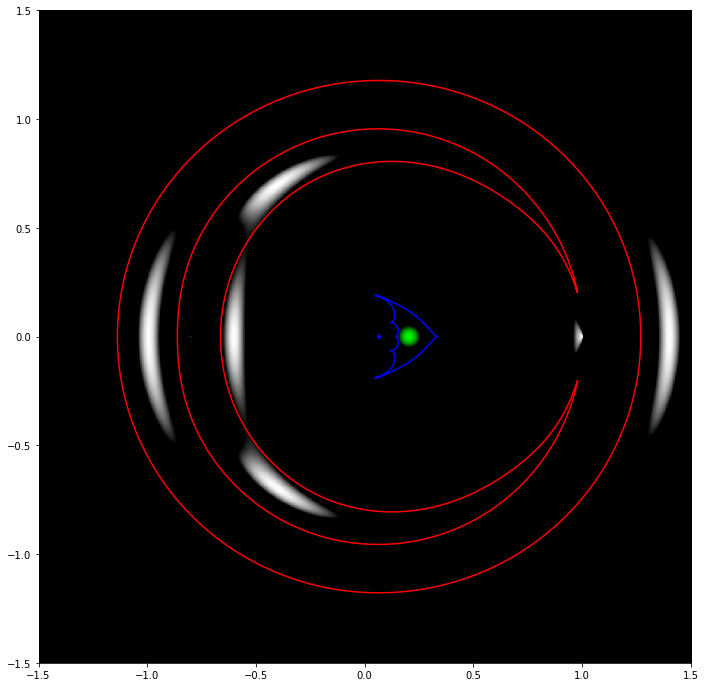

In [4]:
xpos, ypos, r = 0.2, 0.0, 0.05

src = images.CircularSource(V(xpos, ypos)*U, r*U, 1, True)
plt.figure(figsize=(12,12))
plotutil.plotImagePlane(lensInfo, sources=[src]);